This notebook vectorizes the title text, and compares counts for subreddit using different NLP functions. If the title is determined to be insufficient in the final model, the title + selftext column will be used <br>

having issues with nltk. Original notebook code not working for getting the install window to open again, conda says its installed, but notebook isn't able to import. <br>

going to use count vectorizor to piece by piece clean out useless tokens, such as numbers or foreign characters. A min documents parameter should help filter typos as well.

later a gridsearch will be used to generate the actual tokens used, but obvious typos will be addressed here as well as visualization

In [42]:
import pandas as pd
from datetime import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [43]:
df = pd.read_csv('./data/posts_cleaned_140k.csv')

In [44]:
X = df['title']
y = df['sub_bin']
cvec = CountVectorizer(stop_words='english', max_features=1_000)

In [45]:
cvec.fit(X)
X = cvec.transform(X)

In [46]:
X_df = pd.DataFrame(X.todense(),
                    columns=cvec.get_feature_names())

/home/dale/anaconda3/envs/python397/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [47]:
X_df.head(10)

,000,10,100,11,12,13,15,18,19,20,...,worst,wrong,wuhan,yang,year,years,yes,york,young,youtube
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


create date column for viz

In [48]:
viz = pd.concat([X_df, df['sub_bin']],axis=1)

In [49]:
viz_d = viz[viz['sub_bin'] ==0]
viz_r = viz[viz['sub_bin']==1]

In [50]:
viz_r.head()

,000,10,100,11,12,13,15,18,19,20,...,wrong,wuhan,yang,year,years,yes,york,young,youtube,sub_bin
73533,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
73534,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
73535,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
73536,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
73537,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [51]:
viz = viz.drop(columns=['sub_bin'])
viz_r = viz_r.drop(columns=['sub_bin'])
viz_d = viz_d.drop(columns=['sub_bin'])

In [52]:
viz_d.sum().sort_values(ascending=False).head(25)

trump          26968
democrats       5361
clinton         4968
donald          4608
president       4457
hillary         3443
sanders         3357
new             3306
house           3286
democratic      3024
biden           3019
gop             2982
republicans     2857
twitter         2720
bernie          2614
election        2600
says            2578
just            2469
obama           2466
republican      2424
campaign        2315
white           2282
people          2235
party           2216
vote            1927
dtype: int64

In [53]:
viz_r.sum().sort_values(ascending=False).head(25)

biden          10015
covid           4060
trump           3016
new             2684
says            2631
vaccine         2322
democrats       1781
joe             1742
19              1663
police          1437
people          1430
afghanistan     1415
report          1349
americans       1324
america         1313
state           1313
china           1301
texas           1268
school          1258
media           1252
border          1247
election        1223
american        1120
mandate         1118
fauci           1074
dtype: int64

___

# Viz

In [54]:
def viz_bar(data,title,col):
    data.sum().sort_values(ascending=False).head(25)[::-1].plot(kind='barh', figsize=(16, 12), color=col)
    plt.xlabel("Count", labelpad=14)
    plt.ylabel("word", labelpad=14)
    plt.title(title, y=1.02)
    plt.savefig('./output/' + title + '.png');

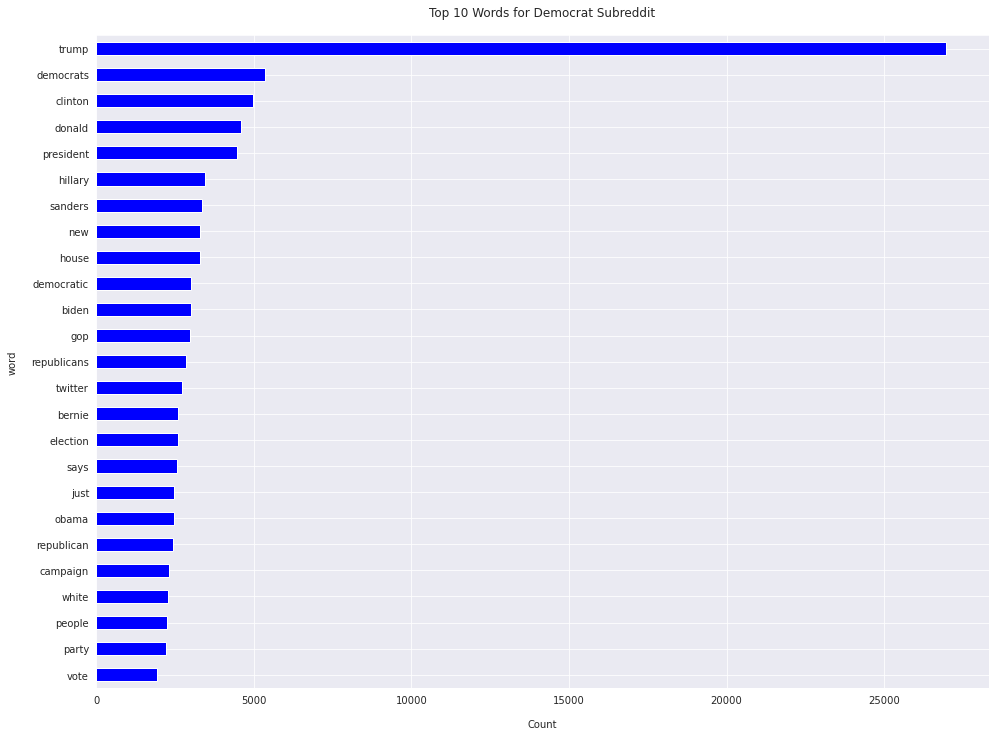

In [55]:
viz_bar(viz_d,"Top 10 Words for Democrat Subreddit",'blue')

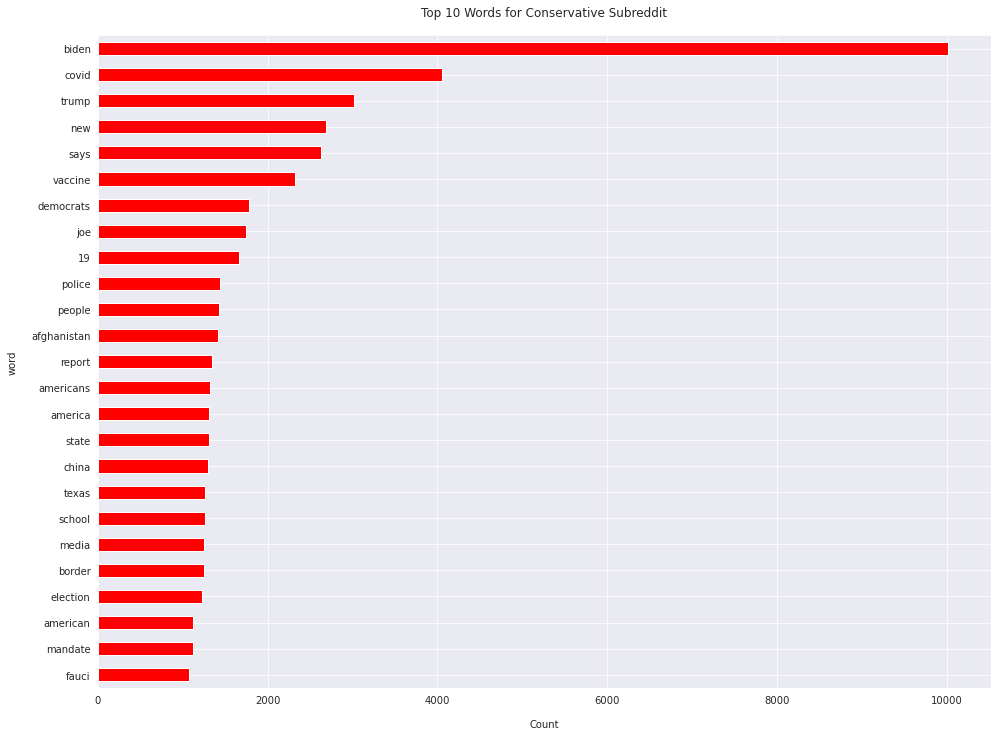

In [56]:
viz_bar(viz_r,"Top 10 Words for Conservative Subreddit", 'red')

Since both subreddits mention similar top words, bigrams will be explored to determine the context differences

In [57]:
df['time'] = pd.to_datetime(df['created_utc'], unit='s')
df['time'].head()
df['date_ymd'] = df['time'].dt.strftime('%Y-%m-%d')
df['date_ymd']

viz = pd.concat([X_df, df['sub_bin']], axis=1)

viz = pd.concat([viz, df['date_ymd']], axis=1)
viz['counter'] = 1

viz_d = viz[viz['sub_bin'] == 0]
viz_r = viz[viz['sub_bin'] == 1]
viz_r

,000,10,100,11,12,13,15,18,19,20,...,yang,year,years,yes,york,young,youtube,sub_bin,date_ymd,counter
73533,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2022-01-17,1
73534,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2022-01-17,1
73535,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2022-01-17,1
73536,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,2022-01-17,1
73537,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2022-01-17,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129560,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2021-05-17,1
129561,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2021-05-17,1
129562,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2021-05-17,1
129563,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2021-05-17,1


In [58]:
def lineplt(data, figtitle, xspacing):

    lineplot = data.groupby('date_ymd').count()

    plt.figure( figsize = ( 20, 8 ) )
    sns.set_style("darkgrid")
    sns.lineplot(x=lineplot.index, y=lineplot['counter'] )
    plt.title(figtitle)
    plt.ylabel('Number of Posts')
    plt.xlabel('Day')

    plt.xticks(ticks=lineplot.index[::xspacing],rotation=45)
    plt.tight_layout()
    plt.savefig('./output/' + figtitle + '.png')
    plt.show();

    return

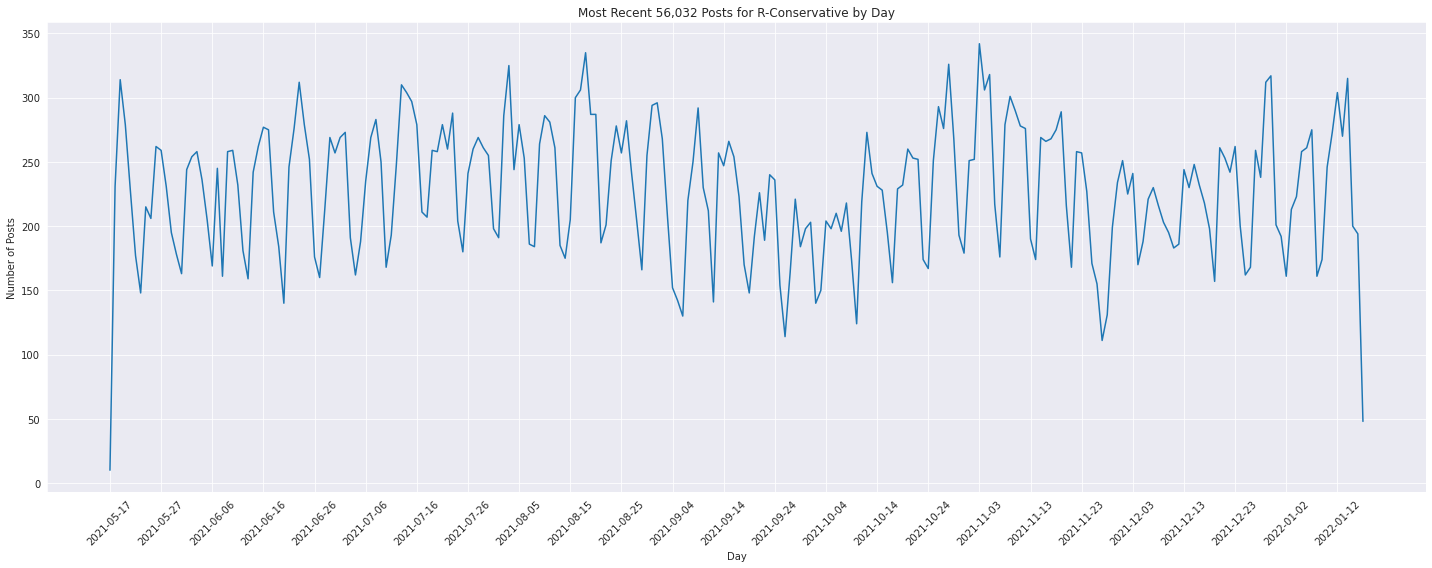

In [59]:
lineplt(viz_r, "Most Recent 56,032 Posts for R-Conservative by Day",10)

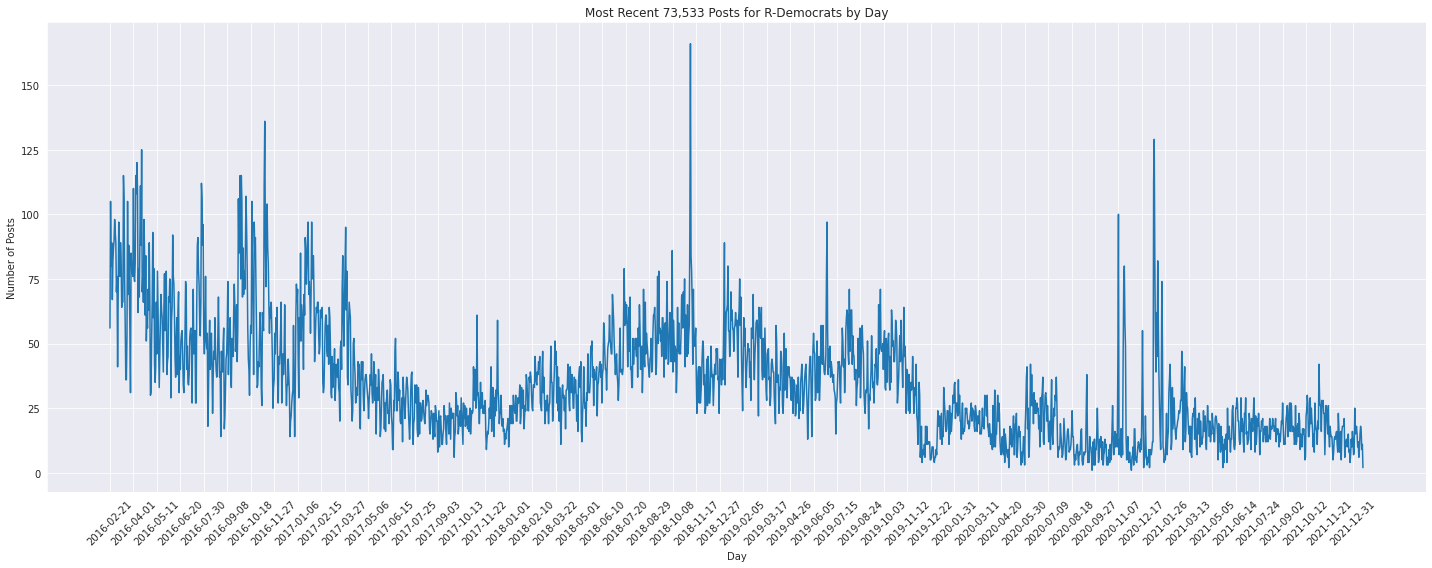

In [60]:
lineplt(viz_d, 'Most Recent 73,533 Posts for R-Democrats by Day',40)

In [61]:
len(viz_r)

56032

In [62]:
len(viz_d)

73533